<a href="https://colab.research.google.com/github/colbrydi/Lithophane/blob/master/Lithophane_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lithophane Library 
written by Dirk Colbry

[Link to slides](https://docs.google.com/presentation/d/1s_8gcGfFDEHnqS7U-TkC4xp9T49fblb2_EWRpsd-v_I/edit#slide=id.g7d81a7112a_0_68)

In this notebook we will use some code that makes lithophanes out of images.  

![Lithophane](https://colbrydi.github.io/images/il_570xN.688476899_eapl.jpg)

Lithophans work by changing the thickness of a material to correspond with how bright or dark a pixel is in an image. Dark pixels are thicker and light pixels are thiner.  This notebook describes steps to build a lithophane using python:

* [Step 1: Installing numpy-stl](#Installing_numpy-stl)
* [Step 2: Reading an image into python](#Reading_an_image_into_python)
* [Step 3: Flat Lithophane](#Flat_Lithophane)
* [Step 4: Cylinder Lithophane](#Cylinder_Lithophane)


---

<a name="Installing_numpy-stl"></a>
# Step 1: Installing numpy-stl

First thing we need to do is install some functions that I have written to convert an image into an stl file.  I have stored these functions in a file named ```lithophane.py``` which should be in the same directory as this notebokk.   These functions also use a module called [numpy-stl](https://pypi.org/project/numpy-stl/) which can be installed using pip. 


&#9989; **<font color=red>DO THIS:</font>** Uncomment the following command (Delete the #) and run the cell using "shift-enter".   your own image and change the following code to display your image. Show the instructor when you get it working.

In [17]:
!pip install numpy-stl

In [18]:
import urllib
urllib.request.urlretrieve('https://raw.githubusercontent.com/colbrydi/Lithophane/master/lithophane.py', 'lithophane.py')
urllib.request.urlretrieve('https://insideindiana.images.worldnow.com/images/9914370_G.jpg?auto=webp&disable=upscale&height=560&fit=bounds', 'image.jpg')

('image.jpg', <http.client.HTTPMessage at 0x7f2d16504710>)

In [0]:
import lithophane as li

**Note** The above import may give a warning.  This can be ignored for now.

---

<a name="Reading_an_image_into_python"></a>

# Step 2: Reading image data into python

There are many python libraries that can read an image.  In this example we will use a very common one called ```matplotlib```.  Run the following code by clicking on the cell and hitting "Shift and Enter" at the same time.

&#9989; **<font color=red>DO THIS:</font>** Upload your own image and change the following code to display your image. UShow the instructor when you get it working.

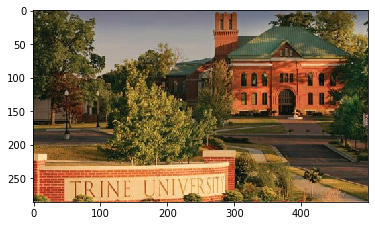

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.image as img
imagefile = './image.jpg'
im = img.imread(imagefile)
plt.imshow(im);

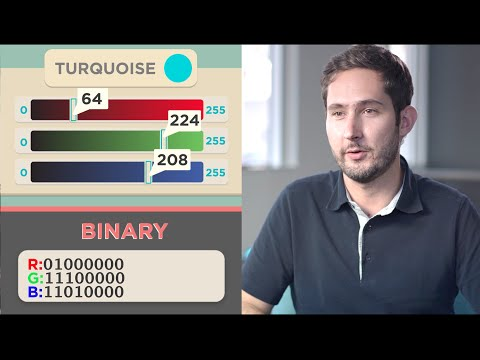

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("15aqFQQVBWU",width=640,height=360)

In [6]:
%matplotlib inline
import matplotlib.pylab as plt
from ipywidgets import interact, fixed
import numpy as np

def showcolor(red,green,blue):
    plt.scatter(1,1, color=(red/255,green/255,blue/255), s=10000 );
    plt.axis('off');
    plt.show();

interact(showcolor, red=(0,255), green=(0,255), blue=(0,255));

interactive(children=(IntSlider(value=127, description='red', max=255), IntSlider(value=127, description='gree…

We use the following fomula to convert the colors to a grayscale value.  An average would work but these look more "realistic":

$$gray = 0.2989r + 0.5870g + 0.1140b$$

<img src="https://cezannec.github.io/assets/cnn_intro/grayscale_image.png" width="60%">

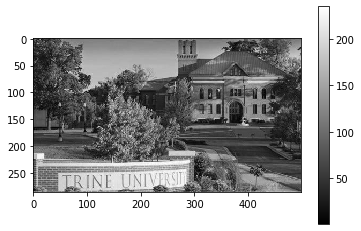

In [21]:
gray = li.rgb2gray(im)
plt.imshow(gray, cmap='gray');
plt. colorbar()

---

<a name="Flat_Lithophane"></a>

# Step 3: Generate Flat Lithophane

First we will start by creating a "point cloud" of three matrixes. The following function takes in a python image object (the one we created above is called ```im```) and returns the point cloud scaled to a width in millimeters.  The aspect ratio of the image will be maintained.  

$$z = h\left(1 - \frac{p}{255}\right) + d$$



$$
\begin{align}
z &- \text{depth value for each pixel} \\
h &- \text{hight of the lithophan (thickness)} \\
p &- \text{pixel value (0-255)} \\
d &- \text{default depth}
\end{align}
$$

In [0]:
#Generate x,y and z values for each pixel
width = 102 #Width in mm
x,y,z = li.jpg2stl(gray, width=width, depth=3, show=False)

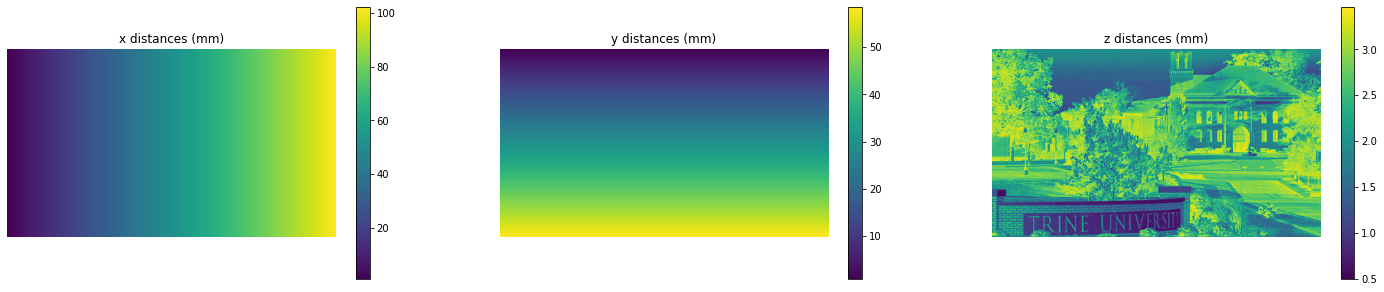

In [39]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.imshow(x)
plt.axis('off')
plt.title('x distances (mm)')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(y)
plt.axis('off')
plt.title('y distances (mm)')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(z)
plt.axis('off');
plt.title('z distances (mm)');
plt.colorbar()

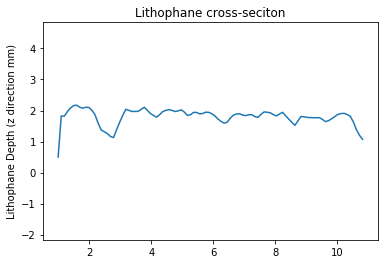

In [40]:
#plot a cross section to try and visualize data
plt.plot(x[550,0:100],z[550,0:100])
plt.axis('equal');

plt.ylabel('Lithophane Depth (z direction mm)')
plt.title('Lithophane cross-seciton');

The following takes our 3D points and creates a mesh model and saves the model as an STL file. A model is just a list of points (x,y,z) and a list of triangles which are just lists of points.

In [0]:
model = li.makemesh(x,y,z);
filename=imagefile[:-4] + '_Flat.stl'
model.save(filename)

We can use the following function to visualize the stl file (note the z axis is _**NOT**_ to scale:

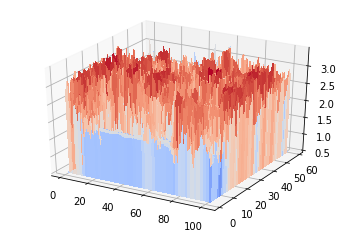

In [44]:
#note z axis is not same scale as x and y axes.
li.showstl(x,y,z)

---

<a name="Cylinder_Lithophane"></a>

# Step 4: Cylinder Lithophane

Since we understand math, there is nothing that requires us to make lithophanes flat.  Consider the following example:

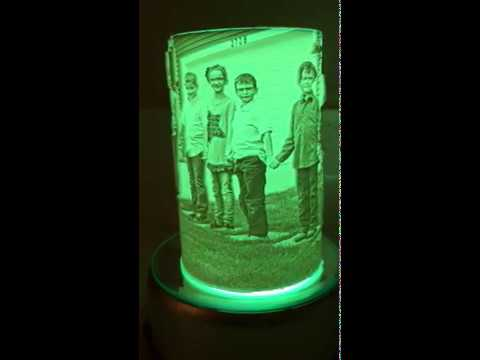

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo("4I3ItcZOAjM",height=320, cc_load_policy=True)

To make lithophans cylinderical we just need to modify the x,y and z values.  The following code wraps x and z axis around the y axis and maintains the pixel depth described above.



Cylinder Radius 16.10648024089981mm


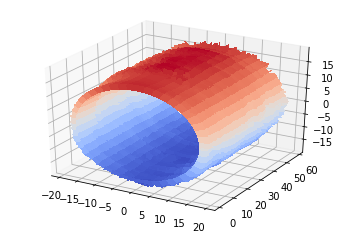

In [15]:
cx,cy,cz = li.makeCylinder(x,y,z)
li.showstl(cx,cy,cz)

We can save the new file using the same ```makemesh``` function from above.

In [0]:
model = li.makemesh(cx,cy,cz);
filename=imagefile[:-4] + '_Cylinder.stl'
model.save(filename)

Here is a timelaps of a printed cylindrical stl file.

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo("-h8pF6psdp4",height=320, cc_load_policy=True)

&#169; Copyright 2019,  Dirk Colbry 